# Regresion Lineal con scikit-learn
### _Este patquete selecciona por si solo los rasgos mas indicados para convertirse en variables predictoras_
* Seleccion a traves del metodo hacia atras
* **Dataset name:** mtcars
* **URL:** https://www.kaggle.com/lavanya321/mtcars

En este ejercicio dedici cambiar el dataset.
* La relacion lineal no esta tan definida como en anteriores casos

## Conozcamos los datos

In [63]:
import pandas as pd #lib dataset management
import numpy as np #number lib
import matplotlib.pyplot as plt#plots and graphics

from sklearn.feature_selection import RFE #Resourced Fisher Elimination
from sklearn.svm import SVR #super vector machine

In [57]:
data = pd.read_csv("../datasets/mtcars.csv")

In [58]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [36]:
data.shape

(122, 9)

In [37]:
data.dtypes

Country              object
Region               object
Hemisphere           object
HappinessScore      float64
HDI                   int64
GDP_PerCapita       float64
Beer_PerCapita        int64
Spirit_PerCapita      int64
Wine_PerCapita        int64
dtype: object

In [38]:
%matplotlib inline

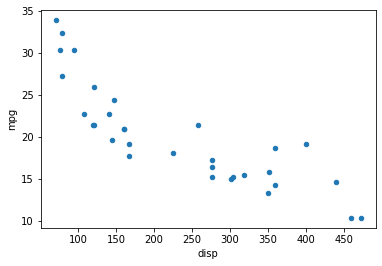

In [71]:
data.plot(kind="scatter", x="disp", y="mpg")

La relacion entre hp y mpg no es completamente lineal, sin embargo para efectos de uso de la libreria podemos usarla y ver como se comporta

In [60]:
data.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


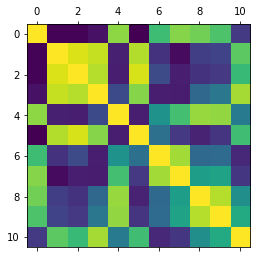

In [77]:
plt.matshow(data.corr())#correlacion entre las variables
# * mas brillante significa mejor relacion

## Realizando el modelo

In [72]:
predictoras = ["hp","disp","drat", "cyl", "wt", "qsec", "vs","am", "gear", "carb"]#columnas que en principio seran predictoras

In [73]:
X = data[predictoras] #predictoras
Y = data["mpg"] #variable a predecir (Metros Por Galon)

In [78]:
estimator = SVR(kernel="linear")#indico estimador
selector = RFE(estimator,3, step=1) #le indico # de varaibles deseadas
selector = selector.fit(X,Y)

In [79]:
selector.support_ #que variables se quedaron? --> drat, cyl,wt

array([False, False,  True,  True,  True, False, False, False, False,
       False])

In [80]:
selector.ranking_ #las seleccionadas son 1, las otras se ordenan de acuerdo a su significatividad (como una competencia)

array([6, 8, 1, 1, 1, 7, 2, 3, 5, 4])

Este metodo nos ahorra muchisimas lineas de codigo, evita los errores humanos.
* Como primera impresion podemos pensar que la relacion lineal mas notable sera entre "Hp" y "mpg". Sin embargo la libreria elimino esa variable y se quedo con otras 3: drat, cyl,wt
    * Como humanos puede ser dificil ver y aceptar que el dato que segun nuestra razon consideramos mas probable sea incluso el menos preciso para el desarrollo del modelo
    * "hp" ocupo el lugar 6. Es decir un dato verdaderamente malo prediciendo los "mpg" en una relacion lineal
        * Quiza en otro tipo de relacion este dato sea mas valorado

### Usando las varaibles seleccionadas

In [81]:
from sklearn.linear_model import LinearRegression

In [83]:
X_pred = X[["drat", "cyl","wt"]]

In [89]:
lm = LinearRegression()
lm.fit(X_pred,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
lm.intercept_ #la alpha

39.76765828456165

In [91]:
lm.coef_

array([-0.01620074, -1.50957715, -3.19473392])

In [92]:
lm.score(X_pred,Y) #valor de R^2 ajustado

0.8302283023977974